# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila franca do campo
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | usogorsk
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | mandapam
Processing Record 6 of Set 1 | el porvenir
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | smithers
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | glace bay
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | shitanjing
Processing Record 13 of Set 1 | rulenge
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | columbia falls
Processing Record 16 of Set 1 | altai
Processing Record 17 of Set 1 | ad dabbah
Processing Record 18 of Set 1 | cuyo
Processing Record 19 of Set 1 | kabala
Processing Record 20 of Set 1 | kirakira
Processing Record 21 of Set 1 | rio grande
Processing Record 22 of Set 1 | ribeira grande
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.7167,-25.4333,18.27,99,70,2.31,PT,1715417029
1,ancud,-41.8697,-73.8203,6.70,87,99,3.48,CL,1715417029
2,usogorsk,63.4106,48.6872,0.93,87,100,3.88,RU,1715417029
3,waitangi,-43.9535,-176.5597,9.90,87,100,6.26,NZ,1715417029
4,mandapam,9.2833,79.1167,29.87,73,100,2.09,IN,1715417029


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,18.27,99,70,2.31,PT,1715417029
1,ancud,-41.8697,-73.8203,6.70,87,99,3.48,CL,1715417029
2,usogorsk,63.4106,48.6872,0.93,87,100,3.88,RU,1715417029
3,waitangi,-43.9535,-176.5597,9.90,87,100,6.26,NZ,1715417029
4,mandapam,9.2833,79.1167,29.87,73,100,2.09,IN,1715417029


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

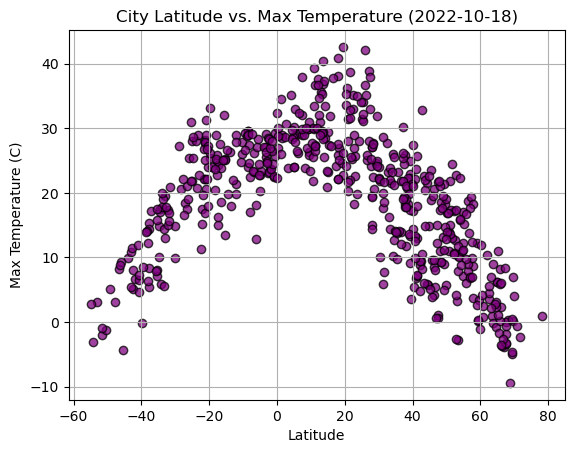

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",alpha=0.75,color="#7F017F",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

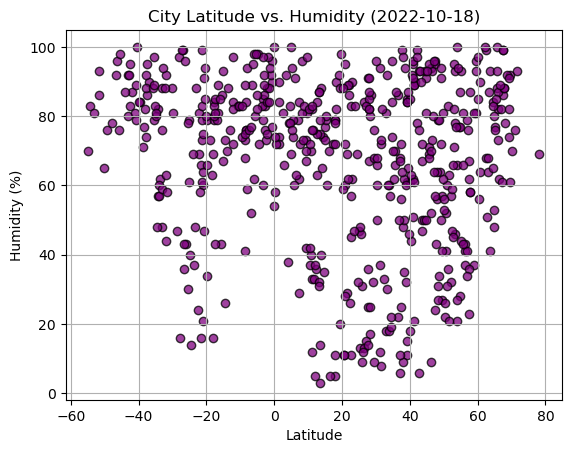

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",alpha=0.75,color="#7F017F",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

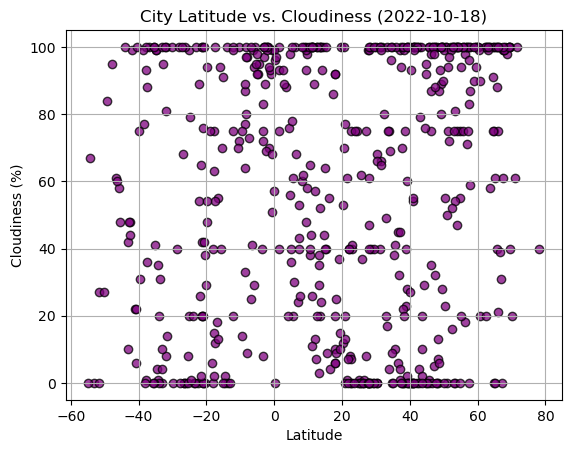

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",alpha=0.75,color="#7F017F",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

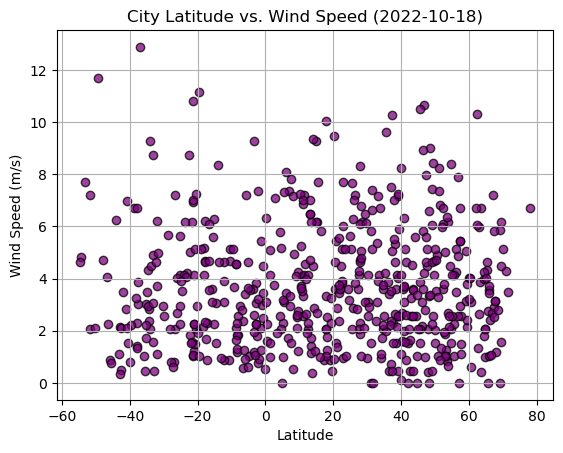

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",alpha=0.75,color="#7F017F",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_func(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    return rvalue, regress_values, line_eq

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,18.27,99,70,2.31,PT,1715417029
2,usogorsk,63.4106,48.6872,0.93,87,100,3.88,RU,1715417029
4,mandapam,9.2833,79.1167,29.87,73,100,2.09,IN,1715417029
5,el porvenir,13.7617,-87.3458,25.63,88,100,0.39,HN,1715417030
7,smithers,54.7804,-127.1743,7.18,87,75,2.06,CA,1715417030


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ancud,-41.8697,-73.8203,6.70,87,99,3.48,CL,1715417029
3,waitangi,-43.9535,-176.5597,9.90,87,100,6.26,NZ,1715417029
6,blackmans bay,-43.0167,147.3167,10.85,92,42,2.15,AU,1715417030
10,grytviken,-54.2811,-36.5092,-3.06,83,67,4.83,GS,1715417030
12,rulenge,-2.7175,30.6325,23.15,76,89,2.24,TZ,1715417031


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8274835459901648


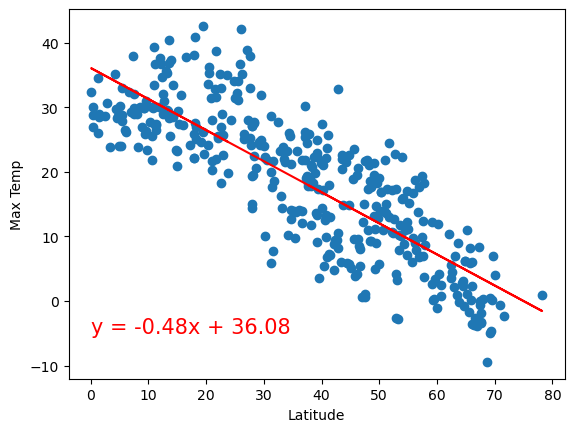

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.7906662781469916


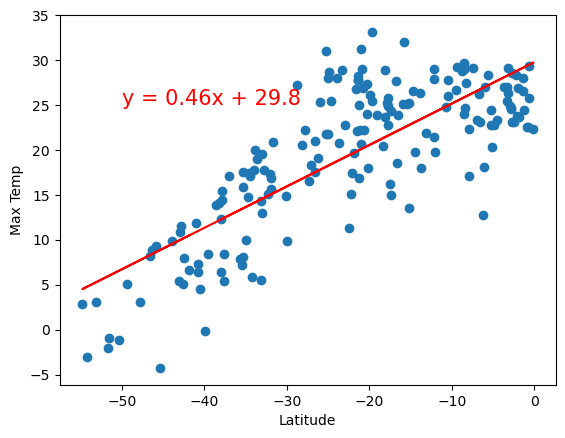

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10675539802471073


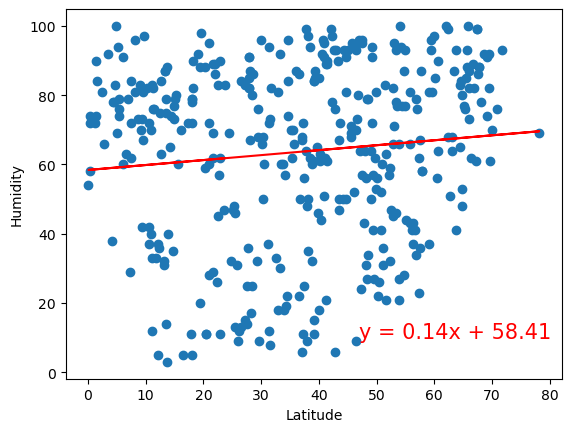

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.018184550721710994


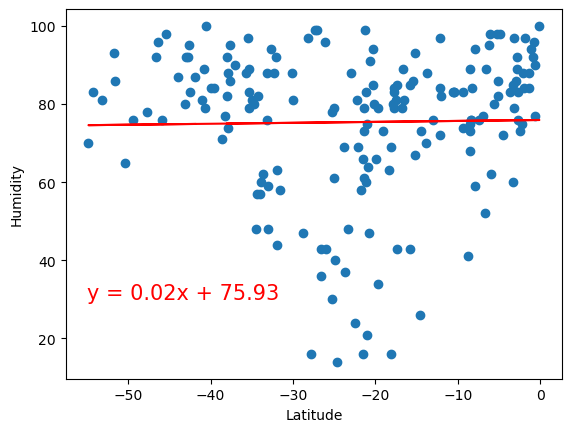

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17509534821913805


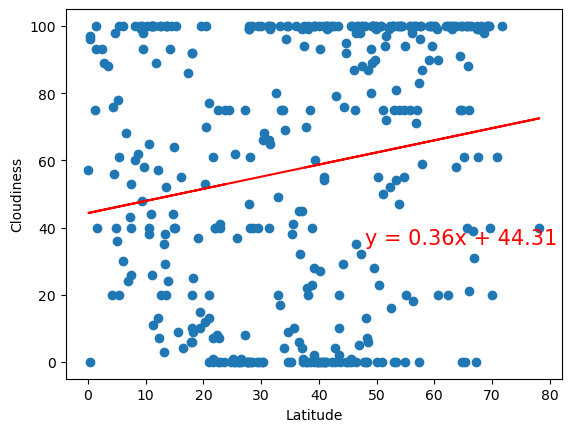

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.2721558527656535


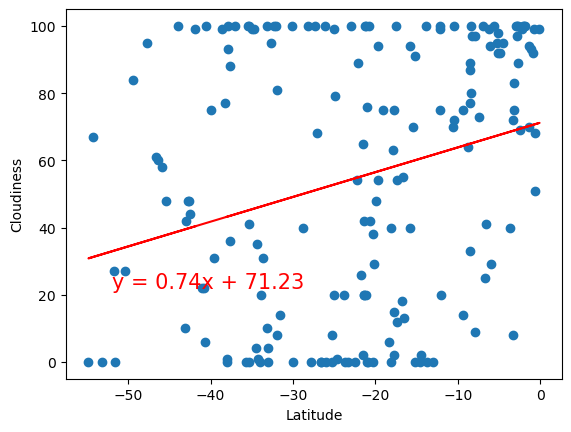

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.042364885467578044


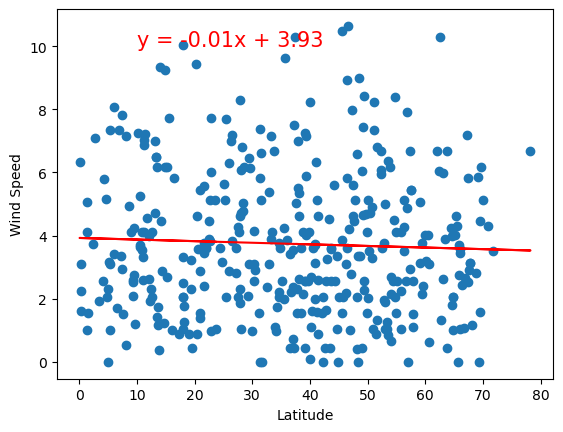

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.11357064326960303


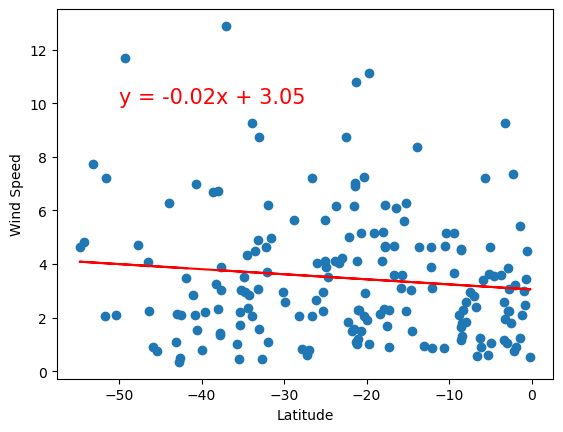

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE